Preprocessing section

In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [2]:
def  train_data(train_path):
    classes, class_paths = zip(*[(label, os.path.join(train_path, label, image))
                                for label in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, label))
                                for image in os.listdir(os.path.join(train_path, label))])
    train_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return train_df

In [3]:
def  val_data(train_path):
    classes, class_paths = zip(*[(label, os.path.join(train_path, label, image))
                                for label in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, label))
                                for image in os.listdir(os.path.join(train_path, label))])
    val_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return val_df

In [4]:
def  test_data(train_path):
    classes, class_paths = zip(*[(label, os.path.join(train_path, label, image))
                                for label in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, label))
                                for image in os.listdir(os.path.join(train_path, label))])
    test_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return test_df

In [5]:
%cd ..

c:\Users\iiven\Ai-Cursor\Chest X-Ray


c:\Users\iiven\anaconda3\envs\AiProjects\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [29]:
%pwd

'c:\\Users\\iiven\\Ai-Cursor\\Chest X-Ray'

In [7]:
train_df = train_data(r'Data\chest_xray\train')

In [9]:
train_df.shape

(5216, 2)

In [10]:
val_df = val_data(r'Data\chest_xray\val')

In [11]:
val_df.shape

(16, 2)

In [12]:
test_df = test_data(r'Data\chest_xray\test')

In [13]:
test_df.shape

(624, 2)

In [14]:
total_df = pd.concat([train_df, val_df, test_df])
total_df.shape

(5856, 2)

In [15]:
total_df.reset_index(inplace= True)

In [19]:
total_df.drop('index', axis= 1, inplace= True)

In [20]:
total_df

,Class Path,Class
0,Data\chest_xray\train\NORMAL\IM-0115-0001.jpeg,NORMAL
1,Data\chest_xray\train\NORMAL\IM-0117-0001.jpeg,NORMAL
2,Data\chest_xray\train\NORMAL\IM-0119-0001.jpeg,NORMAL
3,Data\chest_xray\train\NORMAL\IM-0122-0001.jpeg,NORMAL
4,Data\chest_xray\train\NORMAL\IM-0125-0001.jpeg,NORMAL
...,...,...
5851,Data\chest_xray\test\PNEUMONIA\person96_bacter...,PNEUMONIA
5852,Data\chest_xray\test\PNEUMONIA\person96_bacter...,PNEUMONIA
5853,Data\chest_xray\test\PNEUMONIA\person97_bacter...,PNEUMONIA
5854,Data\chest_xray\test\PNEUMONIA\person99_bacter...,PNEUMONIA


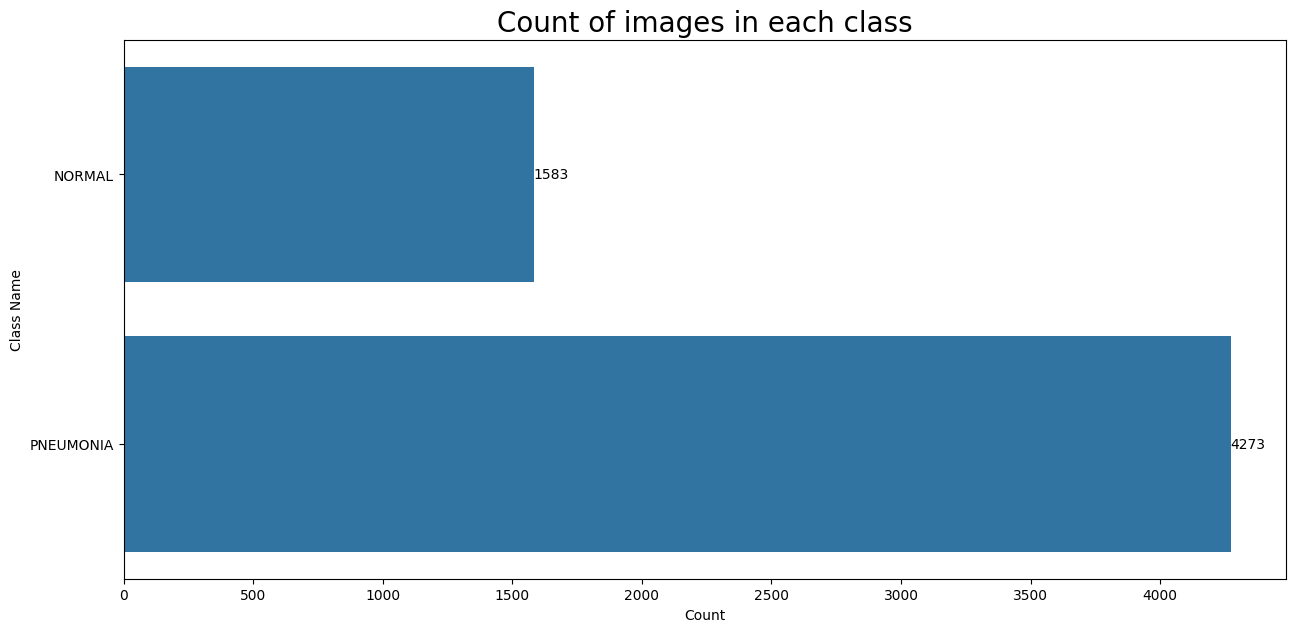

In [21]:
plt.figure(figsize=(15,7))

ax = sns.countplot(data= total_df, y= total_df['Class'])
plt.xlabel('Count')
plt.ylabel('Class Name')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

#### The data appears to be unbalanced, as seen from the count of images in each class.
#### To address this issue, we need to use data augmentation techniques to generate more images.
#### Augmentors can help create variations of existing images, which will help balance the dataset and improve the performance of our model.

In [22]:
# Preparing data for Augmentors
for class_name in total_df['Class'].unique():
    class_dir = f'Data/{class_name}'
    os.makedirs(class_dir, exist_ok=True)

    for path in total_df[total_df['Class'] == class_name]['Class Path']:
        shutil.copy(path, class_dir)

In [23]:
import Augmentor

In [30]:
# Create a pipeline for each class to augment images
import os
# Define the output directory
output_directory = os.path.join('Data', 'AugmentedData')

# Ensure the output directory exists
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Define the number of images per class
target_count = 5000

# Create a pipeline for each class
for class_name in total_df['Class'].unique():
    class_dir = os.path.join('Data', class_name)
    output_class_dir = os.path.join(output_directory, class_name)
    
    # Ensure the class-specific output directory exists
    if not os.path.exists(output_class_dir):
        os.makedirs(output_class_dir)
    
    # Initialize the Augmentor pipeline
    p = Augmentor.Pipeline(source_directory=class_dir, output_directory=output_class_dir)
    
    # Add operations to the pipeline
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.flip_left_right(probability=0.5)
    
    # Calculate the number of images to generate
    current_count = len(os.listdir(class_dir))
    images_to_generate = target_count - current_count
    
    # Execute the pipeline
    if images_to_generate > 0:
        p.sample(images_to_generate)


Initialised with 1583 image(s) found.
Output directory set to Data\NORMAL\Data\AugmentedData\NORMAL.

Processing <PIL.Image.Image image mode=L size=1762x1506 at 0x27EC9888D30>: 100%|██████████| 3416/3416 [00:28<00:00, 120.77 Samples/s]                  


Initialised with 4273 image(s) found.
Output directory set to Data\PNEUMONIA\Data\AugmentedData\PNEUMONIA.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1192x920 at 0x27ECDED5D20>: 100%|██████████| 726/726 [00:03<00:00, 219.21 Samples/s]  


In [35]:
# all Data
os.mkdir('Data/All_Data')

# copy existing data to All_Data
for class_name in total_df['Class'].unique():
    class_dir = os.path.join('Data', class_name)
    output_class_dir = os.path.join('Data', 'All_Data', class_name)
    shutil.copytree(class_dir, output_class_dir)

# copy augmented data to All_Data
for class_name in total_df['Class'].unique():
    class_dir = os.path.join('Data\AugmentedData', class_name)
    output_class_dir = os.path.join('Data', 'All_Data', class_name)
    for file in os.listdir(class_dir):
        shutil.copy(os.path.join(class_dir, file), output_class_dir)


In [38]:
def  Data_frame(Path):
    classes, class_paths = zip(*[(label, os.path.join(Path, label, image))
                                for label in os.listdir(Path) if os.path.isdir(os.path.join(Path, label))
                                for image in os.listdir(os.path.join(Path, label))])
    Data = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return Data

In [40]:
Data= Data_frame(r'Data/All_Data')
Data.shape

(9998, 2)

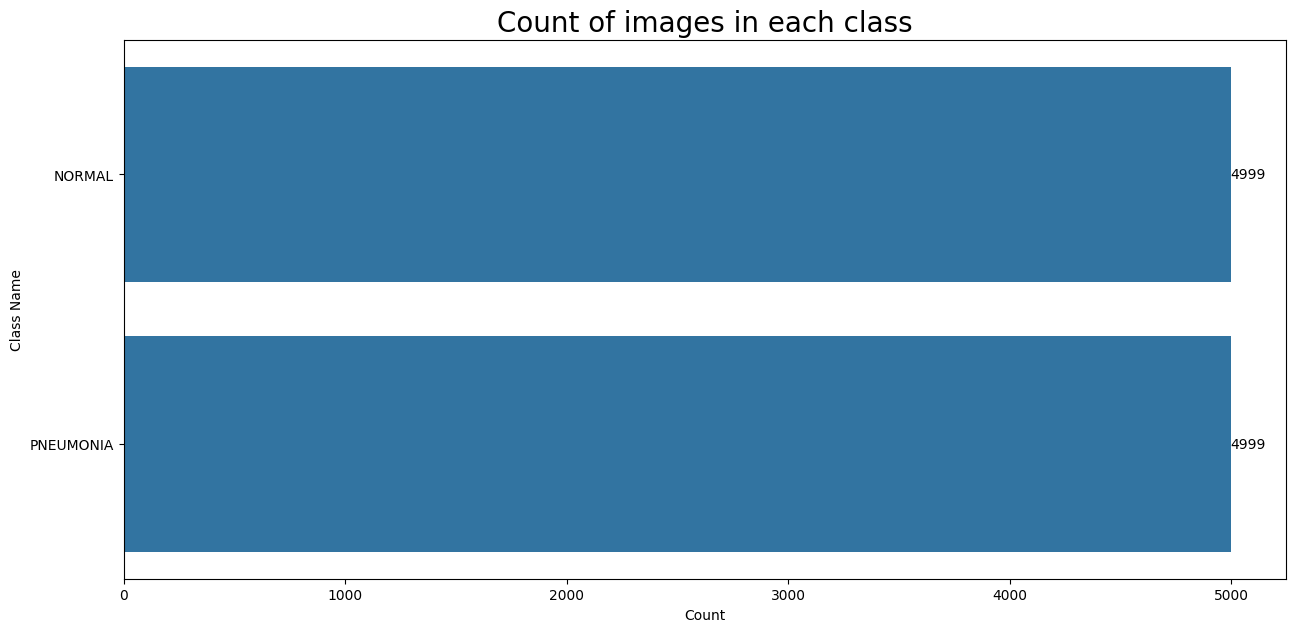

In [41]:
plt.figure(figsize=(15,7))

ax = sns.countplot(data= Data, y= Data['Class'])
plt.xlabel('Count')
plt.ylabel('Class Name')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()